### Python for Data Science (BRN Skill Assessment)

This project is to demonstrate my skills in economical Data Science. It presents my comprehensive analysis of the  gapminder_clean.csv dataset provided. The goal of the analysis is to use appropriate stat tests in order to accurately answer several key questions.

### Step 1: Importing important libraries and cleaning the dataset.

In [ ]:
# Install plotly if not already installed
%pip install plotly

# Import required libraries
import pandas as pd
from scipy.stats import pearsonr, f_oneway, ttest_ind
import plotly.express as px
import plotly.io as pio

# Let plotly know it runs inside a Jupyter Notebook
pio.renderers.default = 'notebook'

In [9]:
df_original = pd.read_csv('data.csv')
df_original.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


The provided dataset was renamed to data.csv and imported as df_original. A quick overview of the dataset shows us there's an unnecessary unnamed column in the start. There are a lot of Null values present in the dataset but we’ll keep them for now. Fortunately, there were no duplicate observations in our dataset.

In [ ]:
df_original.drop(columns='Unnamed: 0', inplace=True)            #Dropping the unnamed column. 
df = df_original                                                #Making a copy of the original dataset. 

### Step 2: Part 1 of the analysis.
* Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing CO2 emissions (metric tons per capita) and gdpPercap for the filtered data.

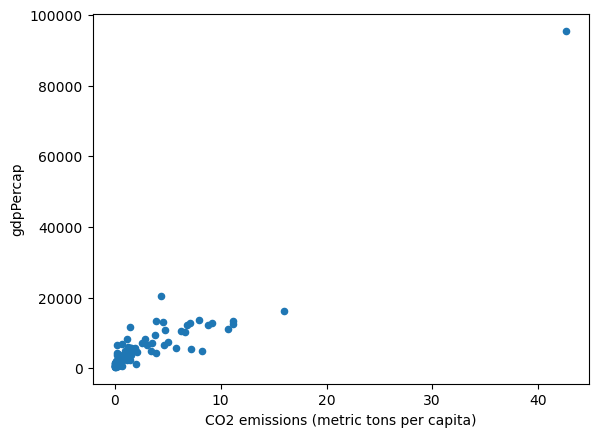

In [13]:
# Install matplotlib if not already installed using %pip magic command
%pip install matplotlib

# Import required library for plotting
import matplotlib.pyplot as plt

# Dropping any null values in the two columns which will be used for analysis
df = df.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])

# Filtering the DataFrame for the year 1962
df_1962 = df[df['Year'] == 1962]

# Creating a scatter plot
df_1962.plot.scatter(x='CO2 emissions (metric tons per capita)', y='gdpPercap')

# Display the plot
plt.show()

* On the filtered data, calculate the correlation of CO2 emissions (metric tons per capita) and gdpPercap. What is the correlation and associated p value?

In [14]:
stat = pearsonr(df_1962['CO2 emissions (metric tons per capita)'],df_1962['gdpPercap'])                         #Using pearson correlation.
print(' Correlation between CO2 Emissions and GDP:', stat[0],"\n",'pvalue:', stat[1])

 Correlation between CO2 Emissions and GDP: 0.9260816725019472 
 pvalue: 1.1286792210038664e-46


The correlation between CO2 Emissions and GDP per capita is strong (closer to 1). The associated P-Value with a significance level (alpha) of 0.05 is also very low, which indicates that the observed data provides strong evidence against the null hypothesis.

* On the unfiltered data, answer "In what year is the correlation between CO2 emissions (metric tons per capita) and gdpPercap the strongest?" Filter the dataset to that year for the next step...

In [15]:
for year in df['Year'].unique():
    df_temp = df[df['Year'] == year]
    print(f"Correlation between CO2 Emissions and GDP in {year} is: {pearsonr(df_temp['CO2 emissions (metric tons per capita)'],df_temp['gdpPercap'])[0]}")

Correlation between CO2 Emissions and GDP in 1962 is: 0.9260816725019472
Correlation between CO2 Emissions and GDP in 1967 is: 0.9387918385063311
Correlation between CO2 Emissions and GDP in 1972 is: 0.8428985866268452
Correlation between CO2 Emissions and GDP in 1977 is: 0.79283359359045
Correlation between CO2 Emissions and GDP in 1982 is: 0.8166384024309293
Correlation between CO2 Emissions and GDP in 1987 is: 0.8095530841191892
Correlation between CO2 Emissions and GDP in 1992 is: 0.8094316203754854
Correlation between CO2 Emissions and GDP in 1997 is: 0.8081396359866697
Correlation between CO2 Emissions and GDP in 2002 is: 0.8006420656289513
Correlation between CO2 Emissions and GDP in 2007 is: 0.7204168835195921


* Using matplotlib, create an interactive scatter plot comparing CO2 emissions (metric tons per capita) and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

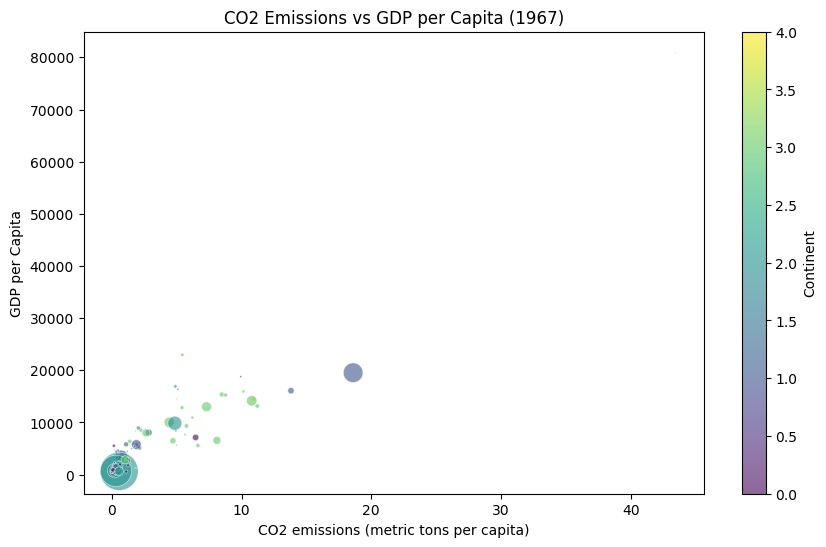

In [23]:
# Step 1: Install matplotlib using piplite
import piplite
await piplite.install('matplotlib')

# Step 2: Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Step 3: Assuming df is already defined and contains the necessary data
# Filter the data for the year 1967
df_1967 = df[df['Year'] == 1967]

# Step 4: Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_1967['CO2 emissions (metric tons per capita)'], 
                      df_1967['gdpPercap'], 
                      c=df_1967['continent'].astype('category').cat.codes, 
                      s=df_1967['pop'] / 1e6,  # Scale the population for better visibility
                      cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('GDP per Capita')
plt.title('CO2 Emissions vs GDP per Capita (1967)')
plt.colorbar(scatter, label='Continent')

# Step 5: Show the plot
plt.show()

### Step 3: Part 2 of the analysis.

* What is the relationship between continent and Energy use (kg of oil equivalent per capita)?

In [24]:
df = df_original                                                                                        #Let's make a fresh copy of the original dataset. 
df = df.dropna(subset=['Energy use (kg of oil equivalent per capita)','continent'])                     #Drop any null values in the two columns where we'll be conducting our analysis. 

In [25]:
continent_groups = df.groupby('continent')
means = continent_groups['Energy use (kg of oil equivalent per capita)'].mean()
continent_data = [df[df['continent'] == continent]['Energy use (kg of oil equivalent per capita)'] for continent in means.index]
statistic, p_value = f_oneway(*continent_data)                                                                                              #We will be using one way ANOVA to answer this question. 
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

ANOVA Test Results:
Statistic: 51.45915759042634
p-value: 8.527003487154367e-39


The one-way ANOVA (Analysis of Variance) test is suitable when we want to compare the means of a continuous variable (Energy use) across multiple groups (the continents).

Since the p-value is significantly smaller than the typical significance level of 0.05, we can conclude that there is strong evidence to reject the null hypothesis. Therefore, we can infer that there is a significant relationship between the continent and Energy use columns in the data.

*In other words, the statistical analysis suggests that **there are significant differences in energy use between the continents.***

To visualize our findings, we will use a box plot. The box plot will display a box for each continent, showing the median, quartiles, and possible outliers. This visualization allows us to compare the distribution of energy use across different continents and observe any differences or similarities.

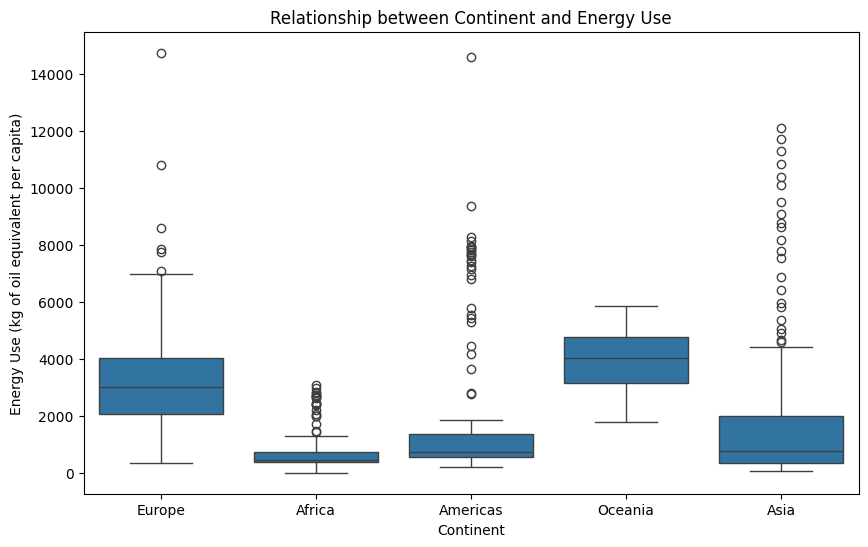

In [29]:
await piplite.install('seaborn')
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='Energy use (kg of oil equivalent per capita)', data=df)


plt.title("Relationship between Continent and Energy Use")
plt.xlabel("Continent")
plt.ylabel("Energy Use (kg of oil equivalent per capita)")


plt.show()

* Is there a significant difference between Europe and Asia with respect to Imports of goods and services (% of GDP) in the years after 1990? (Stats test needed)

In [30]:
df = df_original                                                                                #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Imports of goods and services (% of GDP)', 'continent'])                #Drop any null values in the two columns where we'll be conducting our analysis.

In [31]:
filtered_data = df[df['Year'] > 1990]
filtered_data = filtered_data[['continent', 'Imports of goods and services (% of GDP)']]
europe_data = filtered_data[filtered_data['continent'] == 'Europe']
asia_data = filtered_data[filtered_data['continent'] == 'Asia']
statistic, p_value = ttest_ind(europe_data['Imports of goods and services (% of GDP)'], asia_data['Imports of goods and services (% of GDP)'])              #Using ttest. 
alpha = 0.05
print('p-value:', p_value)
if p_value < alpha:
    print("There is a significant difference between Europe and Asia with respect to imports of goods and services.")
else:
    print("There is no significant difference between Europe and Asia with respect to imports of goods and services.")

p-value: 0.15751969325554196
There is no significant difference between Europe and Asia with respect to imports of goods and services.


We use the ttest_ind function to perform the independent t-test and compare the means of the two groups. (Europe and Asia) The resulting p-value is compared to the significance level (alpha) to determine if there is a significant difference.

Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. So based on the statistical analysis, there is no significant difference between Europe and Asia regarding imports of goods and services in the years after 1990. Let's visualize our findings by comparing the means in a standard bar chart.

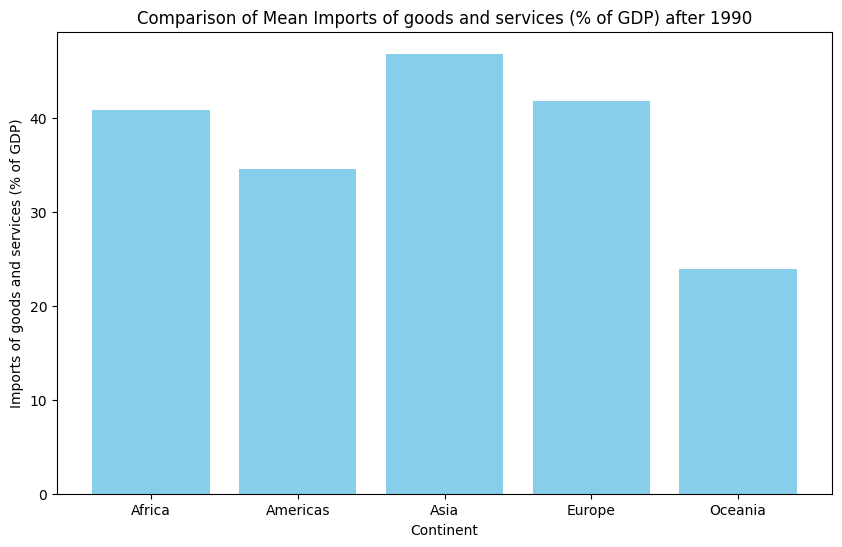

In [33]:
# Calculate the mean of 'Imports of goods and services (% of GDP)' grouped by 'continent'
mean_data = filtered_data.groupby('continent').mean().reset_index()

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_data['continent'], mean_data['Imports of goods and services (% of GDP)'], color='skyblue')

# Add title and labels
plt.title("Comparison of Mean Imports of goods and services (% of GDP) after 1990")
plt.xlabel("Continent")
plt.ylabel("Imports of goods and services (% of GDP)")

# Show the plot
plt.show()

* What is the country (or countries) that has the highest Population density (people per sq. km of land area) across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

In [34]:
df = df_original                                                                                            #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Population density (people per sq. km of land area)', 'Year'])                      #Drop any null values in the two columns where we'll be conducting our analysis.

In [35]:
df_rank = df[['Country Name','Population density (people per sq. km of land area)','Year']]
df_rank.insert(loc = 3, column = 'Rank', value = (df_rank.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False)))
df_rank_avg = df_rank.groupby('Country Name')['Rank'].mean()
df_result = df_rank_avg.to_frame(name = 'Rank Avg').sort_values(by="Rank Avg").reset_index()
print('Countries that have the highest population density (people per sq. km of land area) across all years are:', df_result['Country Name'][0], 'and' , df_result['Country Name'][1])

Countries that have the highest population density (people per sq. km of land area) across all years are: Macao SAR, China and Monaco


* To visualize our findings, we'll use a line graph that shows population density changes over time for each country. To make things simple, only the top 5 countries are shown by default. You can view the data of other countries by clicking the country name on the right.

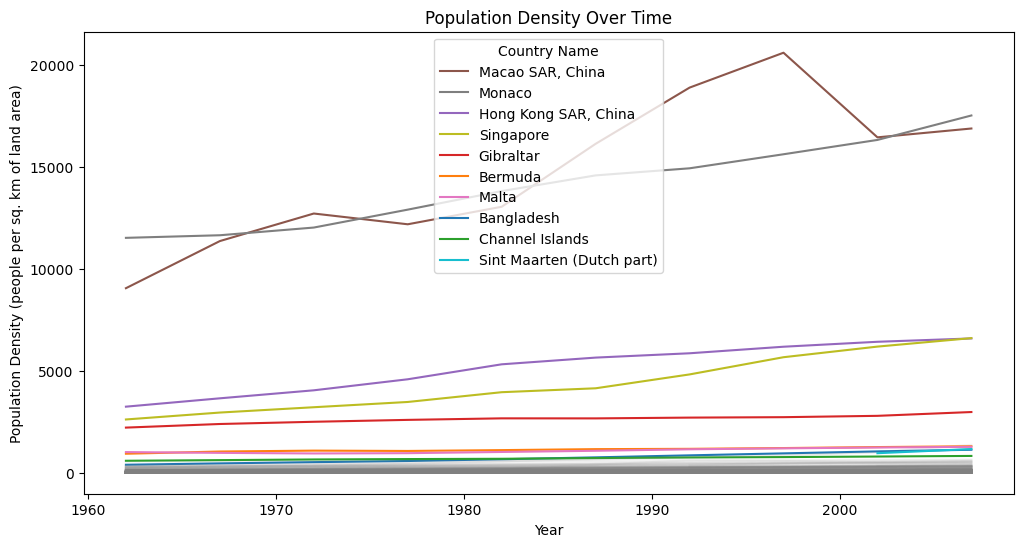

In [38]:
await piplite.install('mplcursors')
import mplcursors

# Filter the top 10 countries based on df_result
top_countries = df_result['Country Name'].values[:10]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines for each country
for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]
    if country in top_countries:
        ax.plot(country_data['Year'], country_data['Population density (people per sq. km of land area)'], label=country)
    else:
        ax.plot(country_data['Year'], country_data['Population density (people per sq. km of land area)'], color='gray', alpha=0.1)

# Add title and labels
ax.set_title('Population Density Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Population Density (people per sq. km of land area)')

# Add legend with top 10 countries only
handles, labels = ax.get_legend_handles_labels()
top_handles = [handles[labels.index(country)] for country in top_countries if country in labels]
top_labels = [country for country in top_countries if country in labels]
ax.legend(top_handles, top_labels, title='Country Name')

# Add interactive cursor
mplcursors.cursor(hover=True)

# Show the plot
plt.show()

* What country (or countries) has shown the greatest increase in Life expectancy at birth, total (years) between 1962 and 2007?

In [39]:
df = df_original                                                                        #Let's make a fresh copy of the original dataset.
df = df.dropna(subset=['Life expectancy at birth, total (years)', 'Year'])              #Drop any null values in the two columns where we'll be conducting our analysis.

In [40]:
filtered_data = df[(df['Year'] >= 1962) & (df['Year'] <= 2007)]
pivoted_data = filtered_data.pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)').dropna()
pivoted_data['Increase'] = pivoted_data[2007] - pivoted_data[1962]
sorted_data = pivoted_data.sort_values(by='Increase', ascending=False)
highest_increase_countries = sorted_data[sorted_data['Increase'] == sorted_data['Increase'].max()]
print(highest_increase_countries.index[0])

Maldives


The country with the highest increase in life expectancy between 1962 and 2007 is Maldives. Next, we'll visualize our findings in a bar chart.

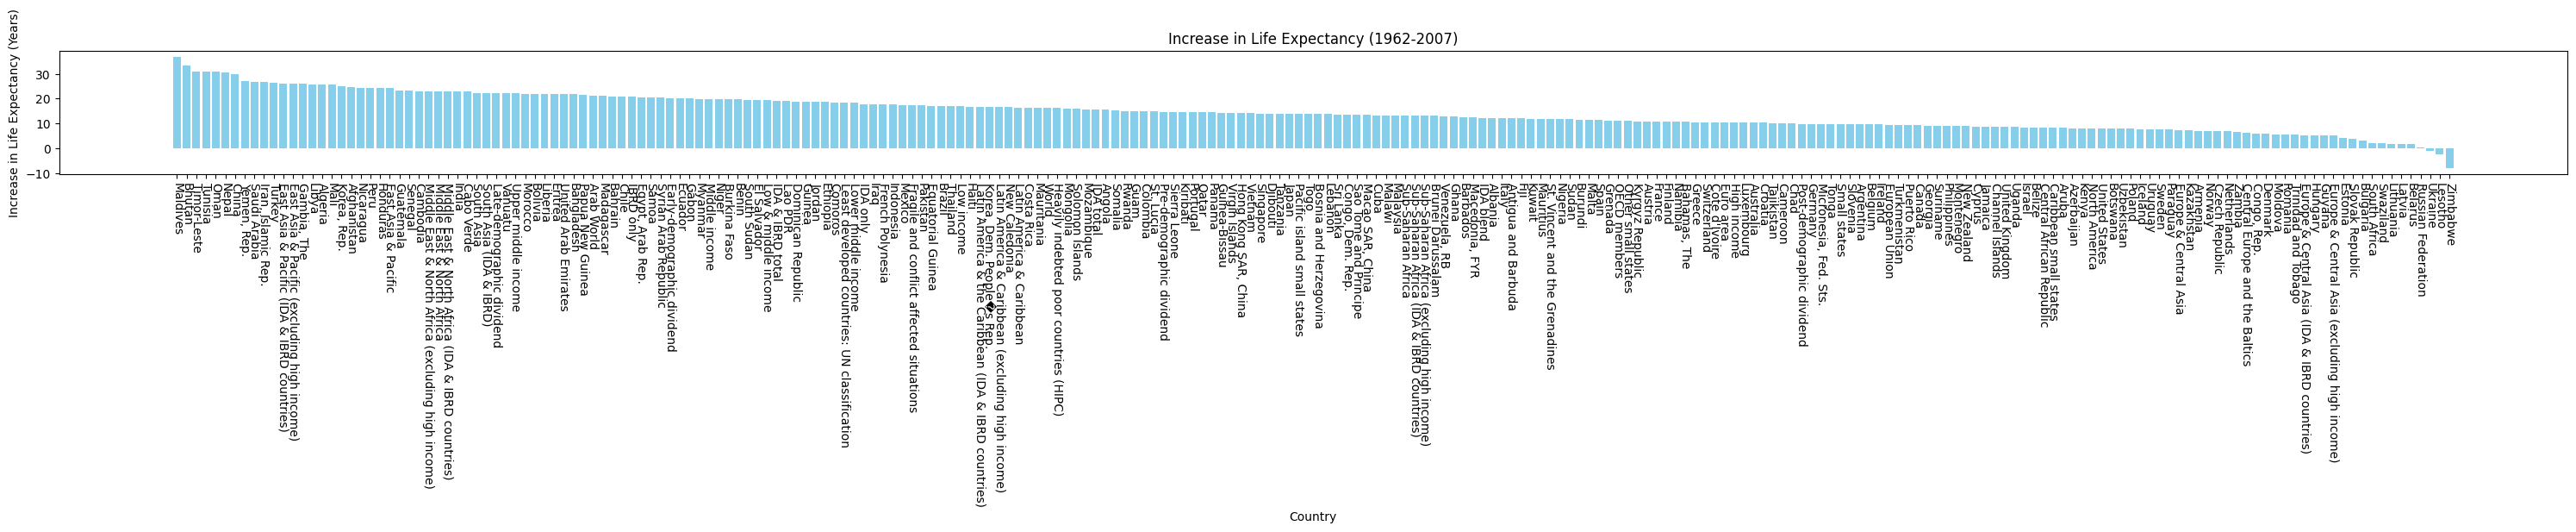

In [45]:
plt.figure(figsize=(30, 6))  # Increase the width to 20 inches for better label visibility
plt.bar(sorted_data.index, sorted_data['Increase'], color='skyblue')

plt.title('Increase in Life Expectancy (1962-2007)')
plt.xlabel('Country')
plt.ylabel('Increase in Life Expectancy (Years)')

plt.xticks(rotation=-90)

plt.tight_layout()

plt.show()